In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import random
import csv

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [3]:
print("Number of images in the training dataset:", train_images.shape[0])
print("Number of images in the testing dataset:", test_images.shape[0])

Number of images in the training dataset: 60000
Number of images in the testing dataset: 10000


In [4]:
print(f"Shape of the images in the training dataset: {train_images[0].shape}")

Shape of the images in the training dataset: (28, 28)


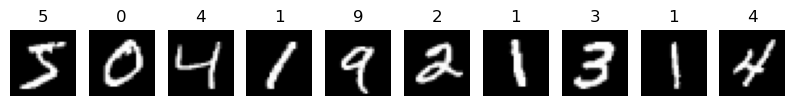

In [5]:
fig, axes  = plt.subplots(1, 10, figsize = (10, 10))
for i in range(10):
    axes[i].imshow(train_images[i].reshape(28,28), cmap='gray')
    axes[i].set_title(train_labels[i])
    axes[i].axis('off')
plt.show()

## Making the FCNN

Nomenclature: Each model is is named as model_activation_xx_xx where activation specifies the type of activation function used, the numbers following represent the number of neurons in each layer. \
For example, model_relu_64_32 means that the model uses relu activation function and has two layers with 64 and 32 neurons respectively.

### Using RELU

In [75]:
model_relu_128_64 = models.Sequential([
    layers.Flatten(input_shape = (28, 28, 1)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
], name = 'model_relu_128_64')

In [76]:
model_relu_128_64.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

histroy_model_relu_128_64 = model_relu_128_64.fit(
    train_images, 
    train_labels,
    epochs=5
)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2379 - accuracy: 0.9301
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0986 - accuracy: 0.9703
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0693 - accuracy: 0.9782
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0516 - accuracy: 0.9844
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0418 - accuracy: 0.9865


In [77]:
test_loss_model_relu_128_64, test_accuracy_model_relu_128_64 = model_relu_128_64.evaluate(test_images, test_labels)
print(f'Accuracy of the neural network on the {test_images.shape[0]} test images: {test_accuracy_model_relu_128_64*100:.2f}%')

313/313 [==============================] - 0s 766us/step - loss: 0.0822 - accuracy: 0.9755
Accuracy of the neural network on the 10000 test images: 97.55%


In [98]:
def plot_learning_curve (history_model, acc ,name = 'learning curve'):
    plt.plot(
        range(1, int(len(history_model.history['accuracy'])+1)),
        history_model.history['accuracy'],
        label = 'accuracy while learning'
        )
    plt.title(name)
    plt.axhline(acc, color = 'green', linestyle = '--', label = f'accuracy on test images ({acc*100:.2f}%)')
    plt.xlabel('No of learning cycles')
    plt.legend(loc = 'lower right')
    plt.ylabel('Accuracy')
    plt.ylim(top = 1)
    plt.show()

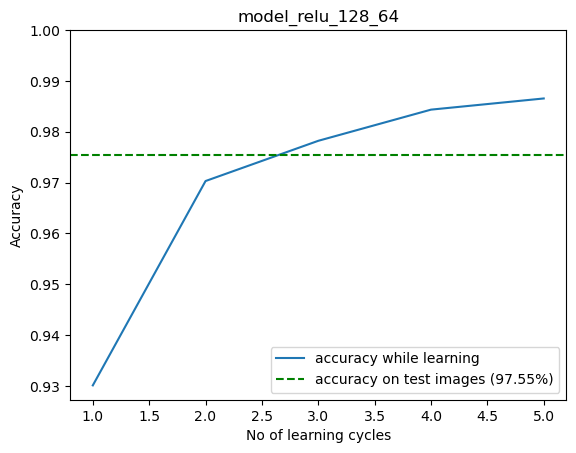

In [99]:
plot_learning_curve(histroy_model_relu_128_64, test_accuracy_model_relu_128_64, model_relu_128_64.name)

In [80]:
def view_classify(image, probabilities):
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(image, cmap='gray')
    ax1.axis('off')
    ax2.barh(np.arange(10), probabilities)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0,1.1)
    plt.tight_layout()

480
1/1 [==============================] - 0s 40ms/step


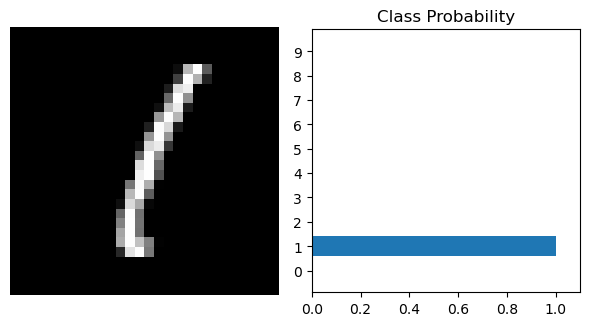

In [81]:
i = random.randint(0,10000)
print(i)
image, label = test_images[i], test_labels[i]
probabilities = model_relu_128_64.predict(image.reshape(1,28,28,1))
view_classify(image, probabilities[0])

### Using Sigmoid

In [108]:
model_sigmoid_128_64 = models.Sequential([
    layers.Flatten(input_shape = (28, 28, 1)),
    layers.Dense(128, activation='sigmoid'),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(10, activation='softmax')
], name = 'model_sigmoid_128_64')

In [109]:
model_sigmoid_128_64.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

histroy_model_sigmoid_128_64 = model_sigmoid_128_64.fit(
    train_images, 
    train_labels,
    epochs=5
)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4634 - accuracy: 0.8807
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1787 - accuracy: 0.9481
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1246 - accuracy: 0.9635
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0939 - accuracy: 0.9724
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0733 - accuracy: 0.9782


In [110]:
test_loss_model_sigmoid_128_64, test_accuracy_model_sigmoid_128_64 = model_sigmoid_128_64.evaluate(test_images, test_labels)
print(f'Accuracy of the neural network on the {test_images.shape[0]} test images: {test_accuracy_model_sigmoid_128_64*100:.2f}%')

313/313 [==============================] - 0s 936us/step - loss: 0.0918 - accuracy: 0.9720
Accuracy of the neural network on the 10000 test images: 97.20%


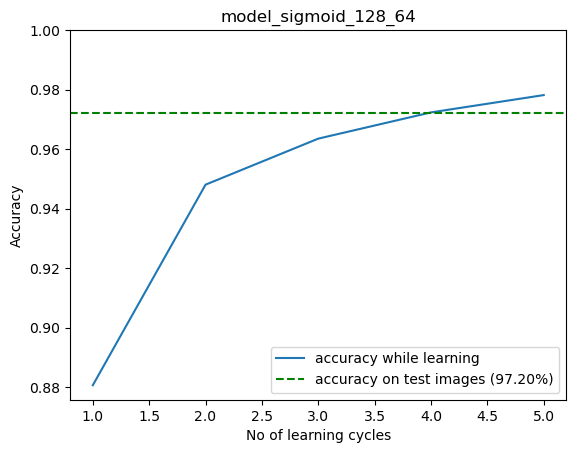

In [111]:
plot_learning_curve(histroy_model_sigmoid_128_64, test_accuracy_model_sigmoid_128_64, model_sigmoid_128_64.name)

8391
1/1 [==============================] - 0s 38ms/step


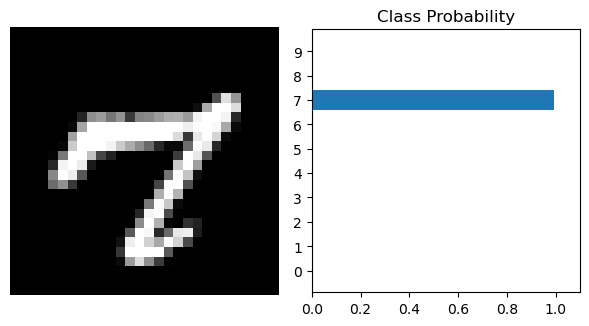

In [112]:
i = random.randint(1,10000)
print(i)
image, label = test_images[i], test_labels[i]
probabilities = model_sigmoid_128_64.predict(image.reshape(1,28,28,1))
view_classify(image, probabilities[0])

### Only one hidden layer with sigmoid

In [9]:
model_sigmoid_one = models.Sequential([
    layers.Flatten(input_shape = (28, 28, 1)),
    layers.Dense(5, activation='sigmoid'),
    layers.Dense(10, activation='softmax')
])
    

In [10]:
model_sigmoid_one.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

histroy_model_sigmoid_128_64 = model_sigmoid_one.fit(
    train_images, 
    train_labels,
    epochs=5
)

Epoch 1/5
1875/1875 [==============================] - 2s 783us/step - loss: 1.4327 - accuracy: 0.6322
Epoch 2/5
1875/1875 [==============================] - 1s 728us/step - loss: 0.8788 - accuracy: 0.7835
Epoch 3/5
1875/1875 [==============================] - 1s 790us/step - loss: 0.6966 - accuracy: 0.8111
Epoch 4/5
1875/1875 [==============================] - 2s 805us/step - loss: 0.6143 - accuracy: 0.8245
Epoch 5/5
1875/1875 [==============================] - 2s 819us/step - loss: 0.5689 - accuracy: 0.8359


In [ ]:
plt.plot()

9614
1/1 [==============================] - 0s 40ms/step


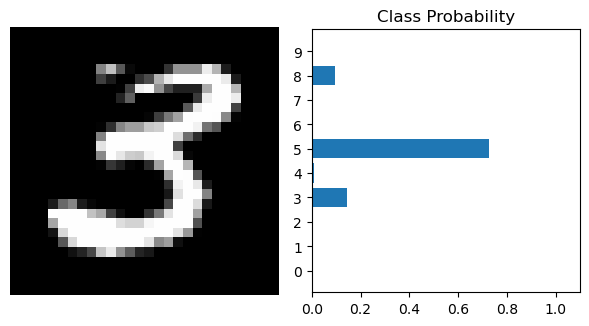

In [18]:
i = random.randint(1,10000)
print(i)
image, label = test_images[i], test_labels[i]
probabilities = model_sigmoid_one.predict(image.reshape(1,28,28,1))
view_classify(image, probabilities[0])

1/1 [==============================] - 0s 11ms/step


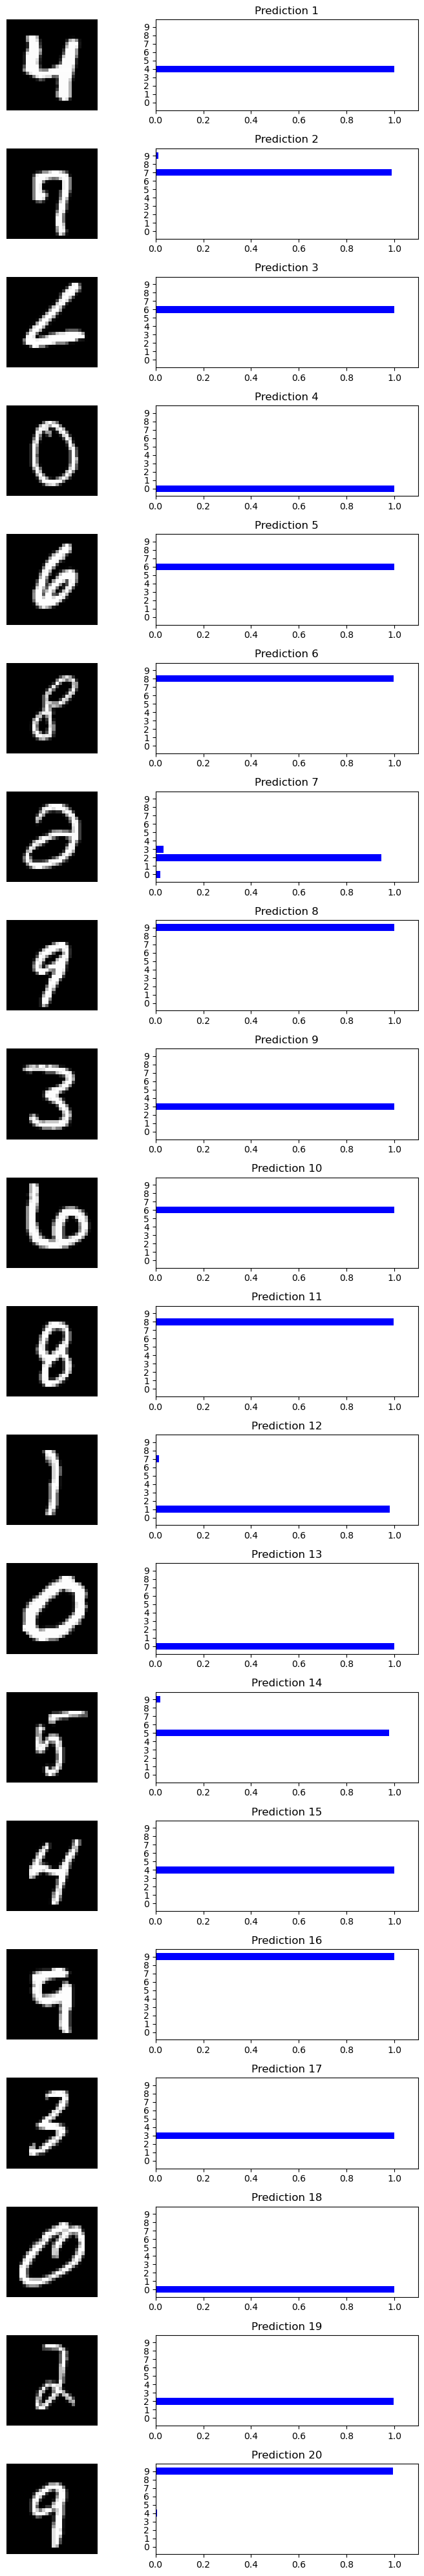

In [19]:
def view_classify_multiple(images, probabilities, num_samples=5):
    fig, axes = plt.subplots(num_samples, 2, figsize=(8, 2 * num_samples))  # Grid of plots

    for i in range(num_samples):
        # Show the image
        axes[i, 0].imshow(images[i], cmap='gray')
        axes[i, 0].axis('off')

        # Show the probability bar chart
        axes[i, 1].barh(np.arange(10), probabilities[i], color='blue')
        axes[i, 1].set_yticks(np.arange(10))
        axes[i, 1].set_xlim(0, 1.1)
        axes[i, 1].set_title(f'Prediction {i+1}')

    plt.tight_layout()
    plt.show()

# Number of samples to classify
num_samples = 20

# Select random indices
indices = random.sample(range(len(test_images)), num_samples)

# Extract images and labels
images = [test_images[i] for i in indices]
labels = [test_labels[i] for i in indices]

# Predict probabilities
probabilities = [np.squeeze(model.predict(image.reshape(1, 28, 28, 1))) for image in images]

# Visualize all results
view_classify_multiple(images, probabilities, num_samples)


## Comparing Models

1/1 [==============================] - 0s 16ms/step


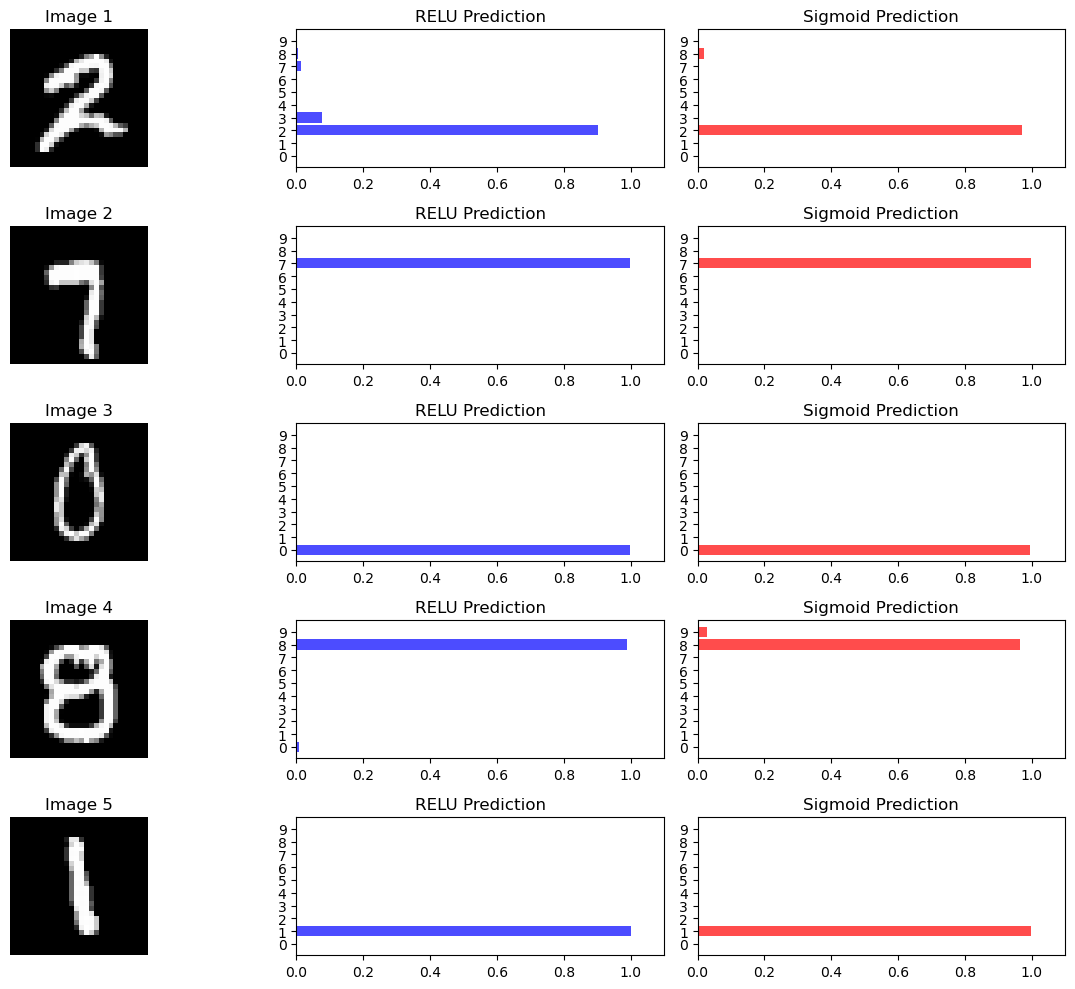

In [20]:
def view_classify_multiple(images, probabilities_one, probabilities_two, num_samples=5):
    fig, axes = plt.subplots(num_samples, 3, figsize=(12, 2 * num_samples))  # Grid of plots

    for i in range(num_samples):
        # Show the image
        axes[i, 0].imshow(images[i], cmap='gray')
        axes[i, 0].axis('off')
        axes[i, 0].set_title(f"Image {i+1}")

        # Model 1 predictions
        axes[i, 1].barh(np.arange(10), probabilities_one[i], color='blue', alpha=0.7)
        axes[i, 1].set_yticks(np.arange(10))
        axes[i, 1].set_xlim(0, 1.1)
        axes[i, 1].set_title('RELU Prediction')

        # Model 2 predictions
        axes[i, 2].barh(np.arange(10), probabilities_two[i], color='red', alpha=0.7)
        axes[i, 2].set_yticks(np.arange(10))
        axes[i, 2].set_xlim(0, 1.1)
        axes[i, 2].set_title('Sigmoid Prediction')

    plt.tight_layout()
    plt.show()

# Number of samples to classify
num_samples = 5

# Select random indices
indices = random.sample(range(len(test_images)), num_samples)

# Extract images
images = [test_images[i] for i in indices]

# Predict with both models
probabilities_one = [np.squeeze(model.predict(image.reshape(1, 28, 28, 1))) for image in images]
probabilities_two = [np.squeeze(model_sigmoid.predict(image.reshape(1, 28, 28, 1))) for image in images]

# Visualize all results
view_classify_multiple(images, probabilities_one, probabilities_two, num_samples)


## Playing around with hidden layers

In [21]:
model_relu_128_64 = models.Sequential([
    layers.Flatten(input_shape = (28, 28, 1)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [22]:
model_relu_128_64.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_model_relu_128_64 = model_relu_128_64.fit(
    train_images, 
    train_labels,
    epochs=1
)

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2408 - accuracy: 0.9296


In [23]:
acc_model_relu_128_64 = history_model_relu_128_64.history['accuracy'][-1]
print(acc_model_relu_128_64*100)

92.96000003814697


In [24]:
model_relu_64_64 = models.Sequential([
    layers.Flatten(input_shape = (28, 28, 1)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [25]:
model_relu_64_64.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_model_relu_64_64 = model_relu_64_64.fit(
    train_images, 
    train_labels,
    epochs=1
)

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2705 - accuracy: 0.9220


In [26]:
acc_model_relu_64_64 = history_model_relu_64_64.history['accuracy'][-1]
print(acc_model_relu_64_64*100)

92.20499992370605


In [27]:
model_relu_08_00 = models.Sequential([
    layers.Flatten(input_shape = (28, 28, 1)),
    layers.Dense(8, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [28]:
model_relu_08_00.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_model_relu_08_00 = model_relu_08_00.fit(
    train_images, 
    train_labels,
    epochs=1
)

1875/1875 [==============================] - 2s 752us/step - loss: 0.5728 - accuracy: 0.8334


In [29]:
acc_model_relu_08_00 = history_model_relu_08_00.history['accuracy'][-1]
print(acc_model_relu_08_00*100)

83.34166407585144


1/1 [==============================] - 0s 16ms/step


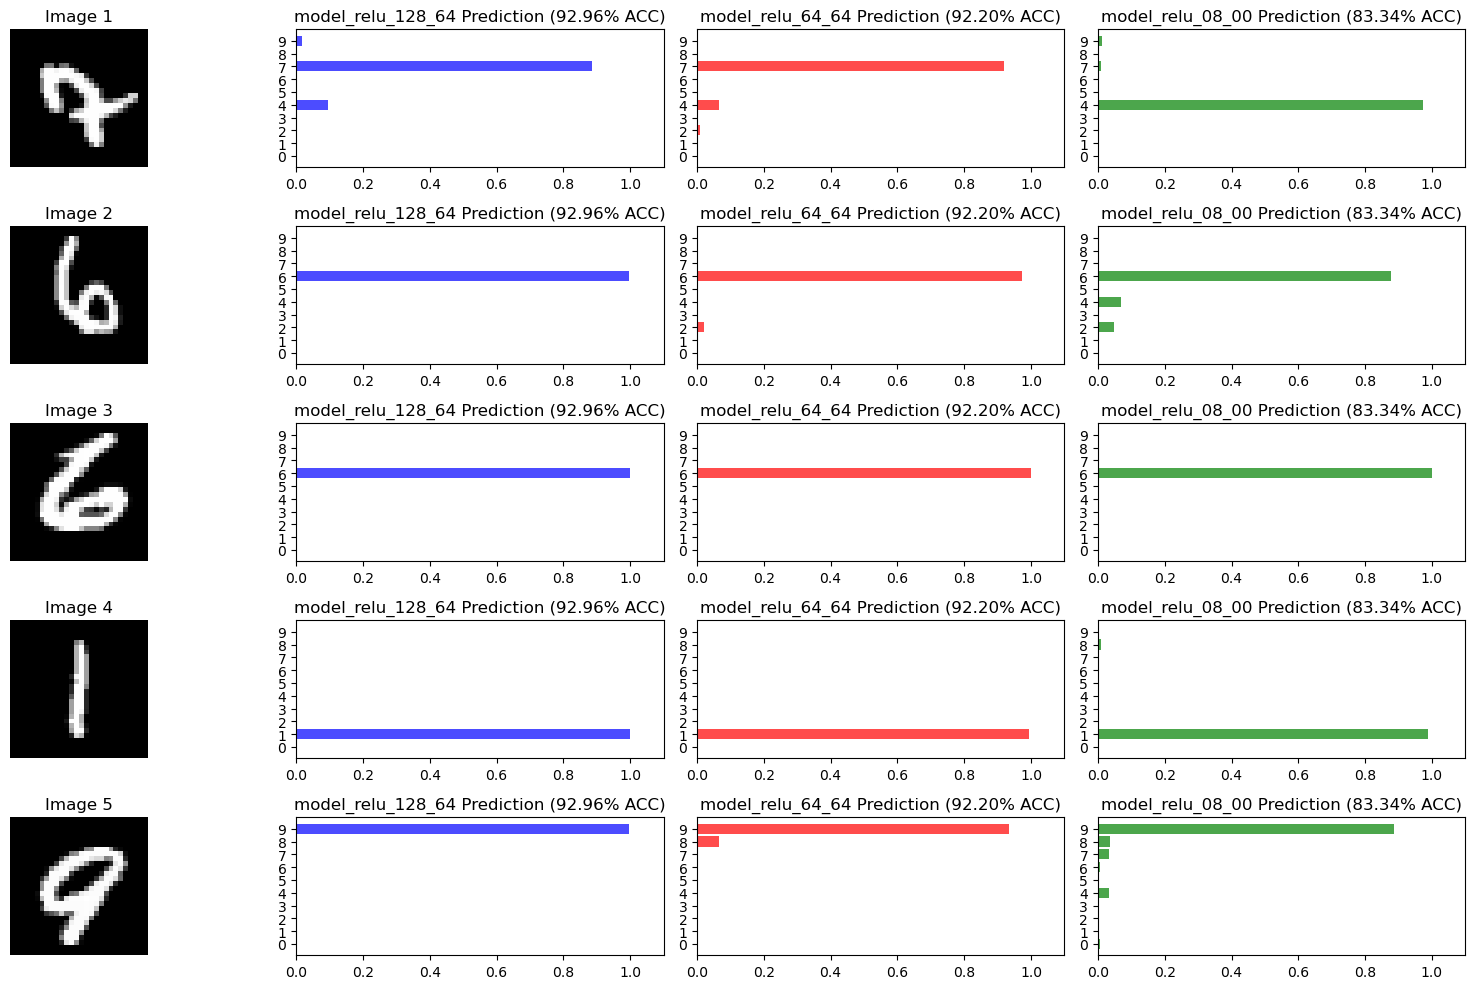

In [30]:
def view_classify_multiple(images, probabilities_one, probabilities_two, probabilities_three, num_samples=5):
    fig, axes = plt.subplots(num_samples, 4, figsize=(16, 2 * num_samples))  # Grid of plots

    for i in range(num_samples):
        # Show the image
        axes[i, 0].imshow(images[i], cmap='gray')
        axes[i, 0].axis('off')
        axes[i, 0].set_title(f"Image {i+1}")

        # Model 1 predictions
        axes[i, 1].barh(np.arange(10), probabilities_one[i], color='blue', alpha=0.7)
        axes[i, 1].set_yticks(np.arange(10))
        axes[i, 1].set_xlim(0, 1.1)
        axes[i, 1].set_title(f'model_relu_128_64 Prediction ({(acc_model_relu_128_64*100):.2f}% ACC)')

        # Model 2 predictions
        axes[i, 2].barh(np.arange(10), probabilities_two[i], color='red', alpha=0.7)
        axes[i, 2].set_yticks(np.arange(10))
        axes[i, 2].set_xlim(0, 1.1)
        axes[i, 2].set_title(f'model_relu_64_64 Prediction ({(acc_model_relu_64_64*100):.2f}% ACC)')

        # Model 3 predictions
        axes[i, 3].barh(np.arange(10), probabilities_three[i], color='green', alpha=0.7)
        axes[i, 3].set_yticks(np.arange(10))
        axes[i, 3].set_xlim(0, 1.1)
        axes[i, 3].set_title(f'model_relu_08_00 Prediction ({(acc_model_relu_08_00*100):.2f}% ACC)')

    plt.tight_layout()
    plt.show()

# Number of samples to classify
num_samples = 5

# Select random indices
indices = random.sample(range(len(test_images)), num_samples)

# Extract images
images = [test_images[i] for i in indices]

# Predict with all three models
probabilities_one = [np.squeeze(model_relu_128_64.predict(image.reshape(1, 28, 28, 1))) for image in images]
probabilities_two = [np.squeeze(model_relu_64_64.predict(image.reshape(1, 28, 28, 1))) for image in images]
probabilities_three = [np.squeeze(model_relu_08_00.predict(image.reshape(1, 28, 28, 1))) for image in images]

# Visualize all results
view_classify_multiple(images, probabilities_one, probabilities_two, probabilities_three, num_samples)


### Training a neural network

In [31]:
model_sigmoid_05_05 = models.Sequential([
    layers.Flatten(input_shape = (28, 28, 1)),
    layers.Dense(5, activation='sigmoid'),
    layers.Dense(5, activation='sigmoid'),
    layers.Dense(10, activation='softmax')
])

In [32]:
model_sigmoid_05_05.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_sigmoid_05_05 = model_sigmoid_05_05.fit(
    train_images, 
    train_labels,
    epochs=30
)

Epoch 1/30
1875/1875 [==============================] - 2s 936us/step - loss: 1.8633 - accuracy: 0.4368
Epoch 2/30
1875/1875 [==============================] - 2s 857us/step - loss: 1.2419 - accuracy: 0.6118
Epoch 3/30
1875/1875 [==============================] - 2s 812us/step - loss: 0.9594 - accuracy: 0.7065
Epoch 4/30
1875/1875 [==============================] - 1s 757us/step - loss: 0.8166 - accuracy: 0.7549
Epoch 5/30
1875/1875 [==============================] - 2s 893us/step - loss: 0.7455 - accuracy: 0.7668
Epoch 6/30
1875/1875 [==============================] - 1s 783us/step - loss: 0.7039 - accuracy: 0.7762
Epoch 7/30
1875/1875 [==============================] - 1s 753us/step - loss: 0.6764 - accuracy: 0.7820
Epoch 8/30
1875/1875 [==============================] - 1s 778us/step - loss: 0.6558 - accuracy: 0.7914
Epoch 9/30
1875/1875 [==============================] - 1s 773us/step - loss: 0.6346 - accuracy: 0.8055
Epoch 10/30
1875/1875 [==============================] - 1s 771u

In [33]:
print(history_sigmoid_05_05.history['accuracy'])

[0.43683332204818726, 0.6118166446685791, 0.7065333127975464, 0.7549333572387695, 0.7667999863624573, 0.7761666774749756, 0.7819666862487793, 0.791366696357727, 0.8054666519165039, 0.8119333386421204, 0.8160833120346069, 0.824566662311554, 0.8343666791915894, 0.8390833139419556, 0.8418499827384949, 0.8443166613578796, 0.8461499810218811, 0.8483666777610779, 0.8496833443641663, 0.8511333465576172, 0.8515833616256714, 0.852483332157135, 0.8536666631698608, 0.8548166751861572, 0.8553666472434998, 0.8575833439826965, 0.8577166795730591, 0.8579333424568176, 0.8604833483695984, 0.8618666529655457]


In [34]:
plt.plot(history_sigmoid_05_05.history['accuracy'])
plt.plot(max(
plt.xlabel('Training Cycles')
plt.ylabel('Accuracy')
plt.title("05_05")

SyntaxError: invalid syntax (2171972937.py, line 4)

In [ ]:
# Save weights to a CSV file
def save_weights_to_csv(model, filename=f'weights.csv'):
    filename= f'weights_{model.name}.csv'
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        
        for layer in model.layers:
            weights = layer.get_weights()  # [weights, biases]
            if weights:  # Some layers might not have weights (e.g., activation layers)
                writer.writerow(["Layer", layer.name])
                writer.writerow(["Weights"])
                writer.writerows(weights[0])  # Save weight matrix
                writer.writerow(["Biases"])
                writer.writerow(weights[1])  # Save biases
                writer.writerow([])  # Empty row for separation

save_weights_to_csv(model_relu_64_64)
print("Weights saved successfully.")

In [ ]:
model_sigmoid_01_02 = models.Sequential([
    layers.Flatten(input_shape = (28, 28, 1)),
    layers.Dense(1, activation='sigmoid'),
    layers.Dense(2, activation='sigmoid'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
model_sigmoid_01_02.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_sigmoid_01_02 = model_sigmoid_01_02.fit(
    train_images, 
    train_labels,
    epochs=100
)

In [ ]:
plt.plot(history_sigmoid_01_02.history['accuracy'])
plt.xlabel('Training Cycles')
plt.ylabel('Accuracy')
plt.title("01_02")

In [ ]:
model_00_00 = models.Sequential([
    layers.Flatten(input_shape = (28, 28, 1)),
    layers.Dense(10, activation='softmax')
])

In [ ]:
model_00_00.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_00_00 = model_00_00.fit(
    train_images, 
    train_labels,
    epochs=100
)

In [ ]:
plt.plot(history_00_00.history['accuracy'])
plt.xlabel('Training Cycles')
plt.ylabel('Accuracy')
plt.title("00_00 (no hidden layers)")